# Linear Classification on the Breast Cancer Dataset Using Neural Networks

## Project Overview
This notebook demonstrates how to build and train a neural network for binary classification using the famous **Breast Cancer Wisconsin dataset**. This is a classic machine learning problem that helps students understand the fundamentals of medical diagnosis prediction.

## Dataset Details
- **Source**: Wisconsin Breast Cancer Dataset (569 samples, 30 features)
- **Task**: Binary classification (Malignant vs Benign tumors)
- **Features**: Cell nuclei characteristics computed from digitized images
- **Real-world relevance**: Medical diagnosis support system

## Technical Implementation
- **Framework**: Keras from TensorFlow - industry-standard deep learning library
- **Model Architecture**: Feedforward neural network optimized for binary classification
- **Best Practices**: Proper train-test split to avoid data snooping and ensure generalization
- **Evaluation**: Comprehensive metrics including accuracy, precision, recall, and F1-score

In [3]:
!pip install tensorflow
!pip install numpy
!pip install scikit-learn
!pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [7]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

## Load, study, and process the data

In [27]:
data = load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

Okay, so a Bunch object is very much like a python `dict`. Let's see what we can do with it.

In [28]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Let's see if the data is balanced.

In [44]:
values, counts = np.unique(data.target, return_counts=True)
for v, c in zip(values, counts):
  print(f"{v}: {c}")

0: 212
1: 357


We see that the data is quite imbalanced. We will stratify our data to ensure that the training is more fair.

Let's now split the data into training and test sets to have clearly separated datasets.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size=0.3,
                                                    random_state=7,
                                                    stratify=y)
observations, features = X_train.shape

Next, we must normalize the data. This is important because features can be differently scaled, and we would like our model to learn patterns fairly without overemphasizing features that have bigger scales.

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build the model

Now, we're ready to build our shallow neural network composed of only 1 layer.

In [68]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_shape=(features,), activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Let's train our model!

In [69]:
result = model.fit(X_train, y_train, epochs=100, verbose=0)

## Test the model

Now that our model is trained, we will test it on our test set.

In [70]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)

print(f"Training score: {train_score[1]:.3f}")
print(f"Test score: {test_score[1]:.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.1109  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9867 - loss: 0.0862 
Training score: 0.967
Test score: 0.971


Not too shabby. In a medical scenario, accuracy alone is not enough. Even more important is recall, since missing a positive case can mean failing to identify a malignant tumor.

In [71]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

# since our output is probabilities
y_pred_labels = (y_pred > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_labels))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.98      0.97      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Let's try retraining our model to prioritize recall as well this time.

In [72]:
from keras.models import clone_model

new_model = clone_model(model)
new_model.compile(optimizer='adam',
                  loss=model.loss,
                  metrics=['accuracy', 'Recall'])

new_result = new_model.fit(X_train, y_train, epochs=100, verbose=0)

In [73]:
train_score = new_model.evaluate(X_train, y_train)
test_score = new_model.evaluate(X_test, y_test)

print(f"Training score: {train_score[1]:.3f}")
print(f"Test score: {test_score[1]:.3f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Recall: 0.9921 - accuracy: 0.9854 - loss: 0.0982  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Recall: 0.9973 - accuracy: 0.9904 - loss: 0.0766 
Training score: 0.982
Test score: 0.977


Our accuracy is also higher as a result. Let's also look at the other metrics.

In [74]:
y_pred_new = new_model.predict(X_test)

# since our output is probabilities
y_pred_new_labels = (y_pred_new > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_new_labels))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



# Visualize the results

Our model is now performing better at identifying malignant tumors, but has gotten poorer at accurately classifying benign ones. Take a look at the 'Extensions' section to see what we can do next.

Finally, let's also visualize how the error and our metrics evolved over the course of our model' training and testing.

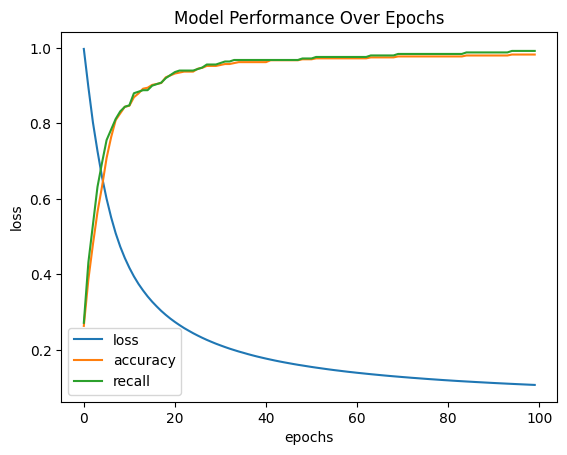

In [79]:
plt.plot(new_result.history['loss'], label='loss')
plt.plot(new_result.history['accuracy'], label='accuracy')
plt.plot(new_result.history['Recall'], label='recall')
plt.title("Model Performance Over Epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

## Conclusion

In this lab, we saw that even a single-layer shallow neural network can achieve remarkably high performance on the Breast Cancer Wisconsin dataset. Despite its simplicity, our model was able to effectively distinguish between malignant and benign tumors, highlighting the potential of deep learning approaches (even with minimal architecture) for medical classification problems. By emphasizing metrics such as recall, especially in the context of medical diagnostics, we were able to ensure our model was not only accurate but also clinically meaningful.

**Extensions**

- Experiment with the neural network’s parameters: Try adding more layers, tweaking activation functions, or adjusting learning rates to explore effects on performance.
- Use different evaluation metrics: Beyond accuracy and recall, implement F1-score, ROC-AUC, or specificity to gain a more nuanced assessment.
- Compare with other ML models: Evaluate classic classifiers such as logistic regression, decision trees, or support vector machines on the same data.
- Try resampling techniques for class imbalance: Test oversampling or undersampling methods and observe how they affect results.
- Incorporate cross-validation: Improve the reliability of your findings by using stratified k-fold validation.
- Test model generalization: Apply the trained model to external datasets or simulated data for broader insights.